## Lecture 1

### Lecture video

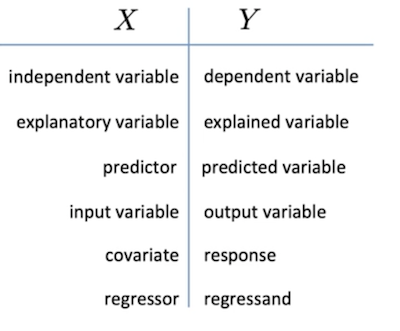

- In some cases, the relation between two continuous variables seems linear.
- We can use an estimated line to explain this relation or to predict a variable based on the information of the other.
- Variables in LR have received different names depending on the goal and the design of the study.

- Expectation of y is the best estimator for the population.
- Expectation of y given x (new information!) is the best estimator for the conditioned population.
    - Ex) What is the best estimator for the house prices where the houses are bigger than a certain value?

#### Simple Linear Regression
$E[Y|X] = \beta_0 + \beta_1X$
- constant + slope times variable

$Y = \beta_0 + \beta_1X + \varepsilon$
- response = line + error (this contains everything)
- We need to assume that $E[\varepsilon \mid X] = E[\varepsilon] = 0$
- The error is not correlated with the information in your regression.
    - Linear regression line with a relationship between the number of firefighters and the number of patents in a certain state
    - Are firefighters more creative? No.
    - Error here: companies that have a lot of patents are usually located in big states. Then, there are many firefighters in those states. 
    
#### Multiple Linear Regression
$E[Y|X] = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_pX_p$
- Still, we will assume that the expectation of the error for the response is zero.

#### Summary
- The conditional expectation is the best predictor of Y given the additional information in the explanatory variables X1, X2, ... , Xp.
- A linear regression is a linear function to model the expectation of a variable _conditional_ on the information given by other explanatory variables:
    - $E[Y|X] = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_pX_p$
- In general, we are _assuming_ this **linear model** for the conditional expectation. 
- If this is not a good assumption, our prediction is no longer the best one, estimates may lose some properties, and some interpretations are invalid.

### Lecture note

- $E[\varepsilon]$ is y-intercept when the error term is for the unconditional expectation.

#### Linear models and property tax assessment
- Different type of variables may be associated with a property assessed value.
- We can ask questions such as:
    - Is the assessed value associated with the size of the house?
    - If I build a new house, what would be its expected assessed value?
- Linear models provide a unifying framework to **estimate and test** the true relation between different type of variables and the assessed value.
- Linear models can also be used to **predict** the assessed value of a house although it may not be the best predictive model.

#### Population and random variable
**Population**
- Consider all residential properties in this county as the "population"
- In general, we don't have information for all the population.
    - Usually we only have a random sample from the population.
 
**Random variable**
- = explanatory variable
- A numerical quantity associated with a randomly selected unit. 
- Ex) `BLDG_METRE` (the size of a house), `GARAGE` (the availability of a garage)

#### The response variable: assessed value
- Just focusing on $Y$; unconditional value.
    - Note: Here, we have the population data, so the avg of the data and the sd of the data is the population quantities. However, we cannot characterize the distribution of the population with only the avg and the sd unless it follows a normal distribution. 

##### We want to predict the assessed value of a property:
- The best guess: $E[Y]$

##### We want to predict the assessed value of a large property (more than 300 mts):
- The best guess: $E[Y|X]$
- The conditional expected value is the best predictor given the additional information about the size.


*Note*: "Best" means that it minimizes the mean squared error (MSE).

#### Conditional distribution
- $Y|X_1 = x$ is a random variable that has a distribution called `conditional distribution`.
    - Note: the average of the distribution $E[Y|X_1 = x]$ is `conditional expectation`
    
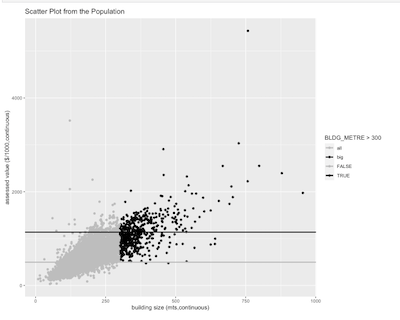
- The black points are the conditioned population.
- The black line is the conditional expectation.
    - We are losing a lot of information!
    - It gets worse when we only use a random sample. We won't have much information if we conditioned on the population.
    - Is it reasonable to make a prediction based on a small number of observations?

#### Incorporate information(linear relationship) in our prediction
- When we have additional information from another variable, we can *condition* on it and look at subgroups of the population to obtain better predictors.
- Linear regression will tell you the relationship between `size` and `assessed value`. 
    - We can use this information to predict.
    - The population above seems to be positively associated!

##### The population conditional means $E[Y|X_1 = x]$ for any building size $x$
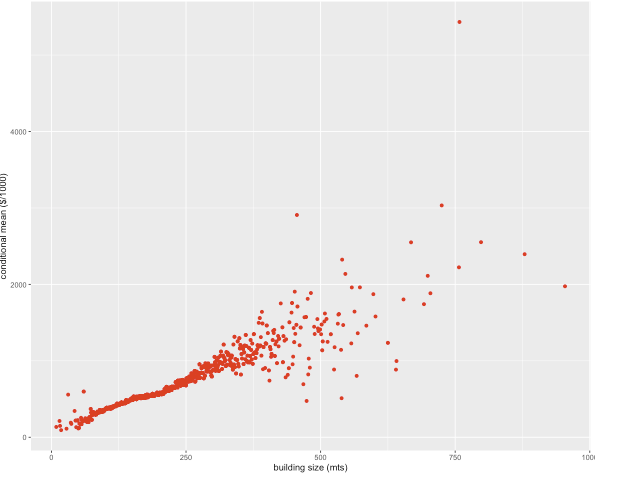
- The red dots are the conditional means for any building size x. 
- Here, the conditional averages are linearly related to the size of the property.

##### The regression line
- $E[Y|X_1] = \beta_0 + \beta_1X_1$
- We can say that "conditional averages are linearly related to $X_1$ and the line is the `linear regression`
- In some cases, this relation is true, but in other cases, we are going to assume it is true.

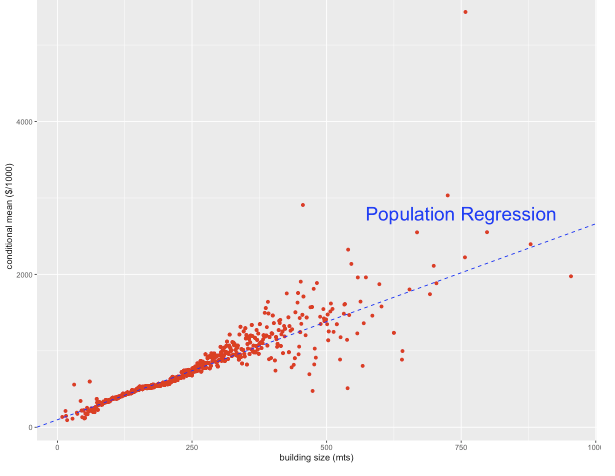

#### The regression line
- A model for the conditional expectation
- Mathematically:
    $E[Y|X_1] = \beta_0 + \beta_1X_1$

##### Regression parameters (or coefficients)
- The true intercept $\beta_0$
- The slope $\beta_1$

##### `lm` function in R
- As the population parameters are usually unknown, we will use a sample to estimate them using the `lm` function in R.

##### The scope of linear regression
- A linear regression is sued to study the relationship between a dependent variable and one of more independent variables.
- Research in linear models has been focused on 3 important aspects: estimation, inference, and prediction
    - Estimation: how to **estimate the true (but unknown) relation** between the dependent and the independent variables
        - Ex) "Does the assessed value depend on the size of a property?"
    - Inference: how to use the model to **infer information about the unknown relation** between variables
    - Prediction: how to use the model to **predict the value of the dependent variable** for new observations
        - Ex) "Can we predict the value of a property given the size?"

## Lecture 2: SLR with continuous or categorical covariates

### Estimating population quantities with a random sample
- In general, we don't know these values:
    - $E[Y]$
    - $E[Y|X_1]$
    - $E[Y|X_1] = \beta_0 + \beta_1X_1$
- But, we can use a random sample to estimate them.

#### What is a random sample?
- Let $(X_{1i}, Y_i) : i = 1, ..., n$ be a random sample of size n from the population.

- Then, $Y_i = \beta_0 + \beta_1X_{1i} + \varepsilon, E[\varepsilon_i \mid X_{1i}] = E[\varepsilon_i] = 0$.
    - This is an assumption that we made for any pair of random variables from our population.
    - $i$ denotes the $i$th experimental unit in our sample.
        - For example, $i$th house in our dataset(sample). 
    - $\varepsilon_i$ contains all factors affecting $Y_i$ other than $X_{1i}$.
    - We assume that these random errors are **independent and identically distributed**: iid assumption.
        - All random response variables are independent as well!
        - The prices of the houses in the sample are independent to each other.

#### Estimating $E[Y]$
- Given a random variable $Y$, its best predictor is its expected value $E[Y]$.
    - "Best" means the predictor that minimizes the mean squared error in the population.
- $E[Y]$ can be estimated with the sample mean $\overline{y}$

#### Estimating population distribution
- To make inference and prediction, it is important to use a representative sample.
- Use sample distribution to estimate the population distribution

#### Estimating conditional expectation $E[Y|X_1>300]$
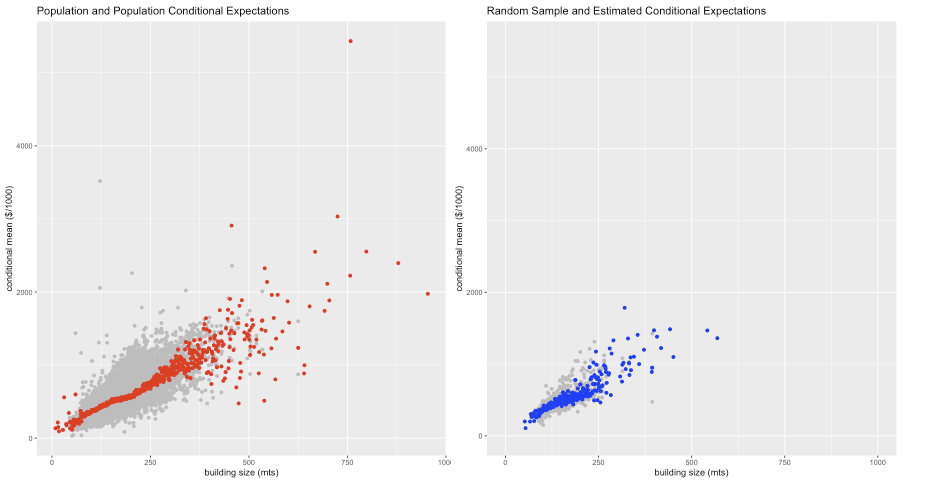

- Sample conditional means can be calculated as the mean of sample values.

#### Estimating the regression line
- We assume that the population conditional expectation is linear:
    - $E[Y|X_1] = \beta_0 + \beta_1X_1$ or
    - $Y = \beta_0 + \beta_1X_1 + \varepsilon, E[\varepsilon|X_1] = E[\varepsilon] = 0$
    
        - Error here is the difference between the regression line($\beta_0 + \beta_1X_1$) and the true $Y$ value. 
        - When we talk about linear regression, we assume that E(error) = 0. That is, we assume that $E[Y|X_1]$ is linear.
        - We can estimate **$\beta_0$ and $\beta_1$ with a random sample**!
        
- If the linearity assumption is good, we can use the estimated LR to predict and infer information about the population.

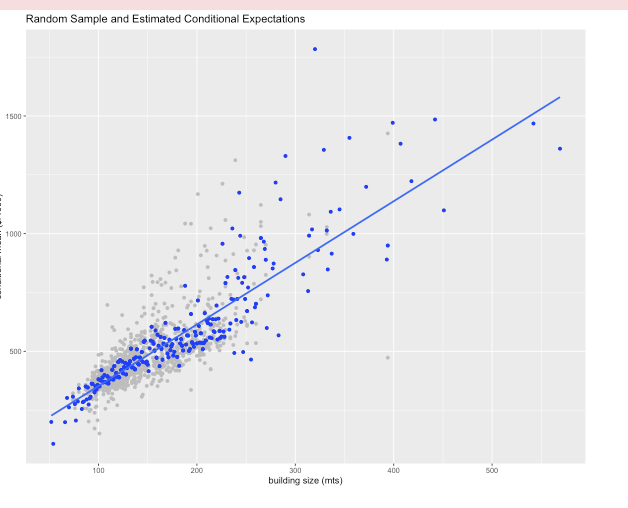

- Blue dots: sample conditional expectations
- Blue line: a regression line estimated with all data in the sample.


**Side note**
- There are other smoother other than LR.
    - Ex) kNN regression

#### Use R to estimate the LR

```r
lm_s <- lm(assess_val~BLDG_METRE,data=dat_s)   # response ~ explanatory 

>>> A tibble: 2 × 5
term	estimate	std.error	statistic	p.value
<chr>	<dbl>	<dbl>	<dbl>	<dbl>
(Intercept)	90.769	9.793	9.268	0
BLDG_METRE	2.618	0.059	44.514	0
```

- $\beta_0$ = 90.769 (y-intercept) and $\beta_1$ = 2.618 (slope)

##### Interpretation of the estimated slope $\beta_1$
- A change of 1 (unit) in (explanatory variable) **is associated with** a 1 (unit) change in (response variable).
    - Estimating _the effect size_ or _causation_ is wrong!
   

##### A quick mathematical note about the slope

It can be proved mathematically that


$\hat{\beta}_1=\frac{r_{XY}s_Y}{s_X}=\frac{\sum_{i=1}^n(X_i-\bar{X})(Y_i-\bar{Y})}{\sum_{i=1}^n(X_i-\bar{X})^2}$


This is the sample version of the population parameter $\beta_1 = \rho \frac{\sigma_Y}{\sigma_{X_1}}$, where $\rho = cor(X,Y)$ and $\sigma$ are standard deviations

> Plug-in estimators: people have suggested other estimators of the mean and the covariance to plug-in


##### The estimated intercept $\beta_0$
- The expected response value when the explanatory variable is 0.
- Note that if the predictor is centered, $X_{1i} - \bar{X}_1$, then the intercept represents the value of a property of average size.
- However, it is important to include an intercept in the LR!!

##### Calculating $\hat{\beta_0}$ and $\hat{\beta_1}$ by hand
        
**Use $\beta_1 = \rho \frac{\sigma_Y}{\sigma_{X_1}}$ and $\hat{\beta_0} = \bar{Y} - \hat{\beta_1}\bar{X_1}$**

```r
mu_x <- mean(BLDG_METRE)
mu_y <- mean(assess_val)
s_x <- sd(BLDG_METRE)
s_y <- sd(assess_val)
r <- cor(BLDG_METRE, dat_s$assess_val)

my_intercept = mu_y - r * s_y/s_x * mu_x
my_slope = r * s_y/s_x  

data.frame(lm_est=lm_s$coef,my_est=c(my_intercept,my_slope))
```

### Categorical predictors (explanatory variables)
- Use `dummy variable` to use linear regression!
    - $1$ if  $X = Y$
    - $0$ if  $X = N$
    
#### Calculating $\hat{\beta_0}$ and $\hat{\beta_1}$ by hand with dummy variable
- $\hat{\beta_0} = E[Y_i \mid X_i = 0]$
- $\hat{\beta_0} + \hat{\beta_1} = E[Y_i \mid X_i = 1]$ 
    - $\hat{\beta_1} = E[Y_i \mid X_i = 1] - \hat{\beta_0}$
        - $ = E[Y_i \mid X_i = 1] - E[Y_i \mid X_i = 0]$
        
        
#### Calculating $\hat{\beta_0}$ and $\hat{\beta_1}$ with `lm` function
```r
tidy(lm(assess_val~FIREPLACE, dat_s))
```

- The estimated coefficients
    - Intercept $\hat{\beta_0}$ is the average Y when X = 'NO' (sample version of the conditional expectation)
    - Slope $\hat{\beta_1}$ is the difference between the two sample averages.

### Summary
- The regression line uses all the data in the sample.
- The regression line tells us how a change in an explanatory variable is associated with a change in the response:
    - For every SD that X increases above the mean, Y increases $\rho$-SD above its mean
    - There is a regression towards the mean
- We can reproduce the estimates and tests seen in previous inference course using a LR, even when there is not a linear representation between the variables

## Lecture 3
### Lecture Video
- Why can we not say $Y = \beta_0 + \beta_1X$?
    - It is not always true like a mathematical equation
    - If we add error term, the distance between true points and a regression line will be the error term.
    
- How do we identify the "best" linear regression line?
    - A line that minimizes mean squared error.
    - When we calculate the errors, we will know that the conditional expectation of Y given X is the best line. 

- Categorical variable
    - Create a dummy variable
    - If $X_2 = 0$, then $E[Y|X_2 = 0] = \beta_0$ (mean of reference group)
    - If $X_2 = 1$, then $E[Y|X_2 = 1] = \beta_0 + \beta_1$  ($\beta_1$ = difference of group means)
    
- How to visualize the conditional expectation of population?
    - We usually want to go beyond the sample.
    - Finite population : we can visualize
    - Infinite population (Bivariate Normal) : not easy to visualize
        - Normal distribution on top of each value effect.
        - Conditional distribution is normal distribution, the center of the distribution is the line.
    - Finite population : simulated data
        - Conditional expectation is exactly linear
        - We can use all the data in the sample to estimate the conditional expectation line.
        
- A random sample
    - Is it representative?
    - Can we generalize to which extent?
    - When we make conclusions outside of our sample, who are we really talking about?

(마지막 써머리)

### 1. Simple linear regression 
- Simple linear regression
    - one explanatory variable and one response. 
    - Let ($X_1$, $Y_1$), ($X_2$, $Y_2$), ... , ($X_n$, $Y_n$) be a random sample of size $n$, where $X_i$ is the explanatory variable and $Y_i$ is the respose.

        $$\text{model} : Y_i = \beta_0 + \beta_1X_i + \varepsilon_i$$


### 2. Estimators of regression coefficients

| Coefficient's name | Population coefficient                    | Estimator of the coefficient                                                                                                  |
|--------------------|-------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------|
| Intercept          | $\beta_0 = E[Y] - \beta_1E[X]$            | $\hat{\beta_0} = \bar{Y} - \hat{\beta_1}\bar{X}$                                                                                |
| Slope              | $\beta_1 = \rho\frac{\sigma_Y}{\sigma_X}$ | $\hat{\beta_1} = \frac{r_{XY}s_Y}{s_X}$ <br> $= \frac{\sum \limits_{i=1}^{n}(X_i - \bar{X})(Y_i - \bar{Y})}{\sum \limits_{i=1}^{n}(X_i - \bar{X})^2}$ |


- The `lm` function in R estimates intercept and slope using these equations. 
    - `lm` estimates the regression coefficients using a method called "least squares".
    - `lm` calculates error on parameter estimates based on an assumption of normality. Bootstrapping makes no such assumption on the distribution.


```r
lm_s <- lm(assess_val~BLDG_METRE,data=dat_s)
```

**Visualizing regression line**

```r
dat_s %>% 
    ggplot(aes(BLDG_METRE, assess_val)) 
        + theme(axis.text.x = element_text(angle = 90))+
        geom_point()+ 
        geom_abline(intercept=coef(lm_s)[1],slope=coef(lm_s)[2], col = "blue")
```

### 3. Uncertainty in the estimation

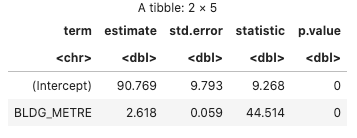

- The last 3 columns have important quantities to assess uncertainty and test hypotheses about the coefficients. 

#### 3.1. Standard errors
- How much variation should we expect?
- It is in the 3rd column of the tidy table (result of `lm` based on an assumption of normality)
- Why do we want to compute the standard error?
    - It is because our estimates are based on only **one** random sample.
- The standard error of an estimator measures its expected variated due to random variation in the sample. 
- In practice, we don't have many samples -- we can use **bootstrapping** to measure the standard errors of our estimators.


#### 3.2. Bootstrapping
- To estimate population parameters with one sample:
    - we take bootstrap samples from one sample
    - all bootstrap estimates will give us an idea (estimates) of population.
    - sampling distribution, mean, se of $\hat{b}$
    
- We can also use bootstrapping to estimate coefficients of a regression line!

```r
    N = 1000
    B = 1000
    
    lm_boot <- replicate(B, {
      sample_n(dat_s, N, replace = TRUE) %>% 
        lm(assess_val~BLDG_METRE,data=.) %>%  # generate regression estimates
        .$coef 
    })
```

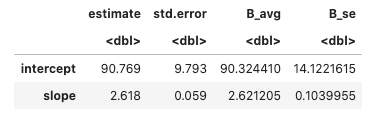

**`lm` estimates vs estimated mean by bootstrapping**

- Estimates of coefficients ($\beta_0$, $\beta_1$) are similar!
    - This is expected since least square estimates are unbiased.
- But, estimates of standard error are not so close. 
    - It is because `lm` is computing based on `asymptotic theory (assumption)`

#### 3.3 Sampling distribution

- Estimates from bootstrapping

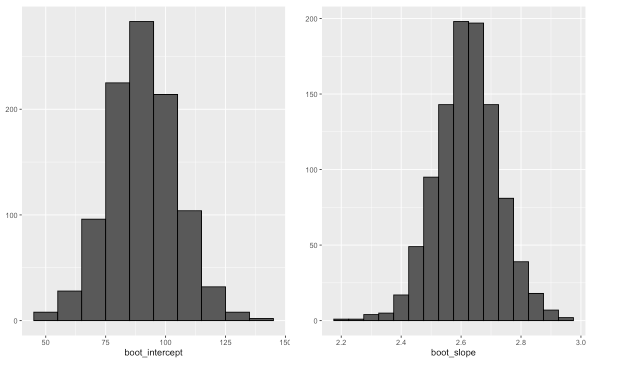

- Under certain conditions, the sampling distribution of the regression coefficients is **asymptotic Normal**.

#### 3.4 Confidence intervals
- We can estimate confidence intervals from bootstrapping.
- Two ways:
    - Bootstrap-normal-theory CI: $\hat{b} \pm z_{\alpha/2}\text{SE}^*(\hat{b})$
        - It is usually not great to assume that the bootstrap distribution follows a normal distribution.
    - Bootstrap-percentile CI: $(\hat{b}^*_{\alpha/2}, \hat{b}^*_{1-\alpha/2})$
    
    ```r 
    # normal theory 
    slope_s + qnorm(0.025) * sd(slope_B)
    slope_s - qnorm(0.025) * sd(slope_B)
    ```

    ```r
    # percentile
    quantile(slope_B,0.025)
    quantile(slope_B,0.975)
    ```

**CI using asymptotic theory**
- `lm` uses results from asymptotic theory to construct confidence intervals.
- This CIs are computed using the t-distribution with $n - p$ degrees of freedom, where $n$ is the sample size and $p$ is the number of parameters.

### 4. Prediction using the estimated regression

#### 4.1. `predict()`
- You can get predicted value with `predict()` and the `lm` result

```r
predict(lm_s,data.frame(BLDG_METRE=320)
predict(SL_reg) # SL_reg = lm(total_engagement_percentage ~ page_engagement_percentage, data = facebook_data)
```

#### 4.2. Estimator (predictor)
$$ \hat{y}_i=\hat{\beta_0} + \hat{\beta_1} * x_{i}$$

- The predictor is also a random variable since it's a function of the estimated coefficients. 

#### 4.3. Prediction error: the residuals
- The difference between the true observations ($y_i$) and my predictions ($\hat{y}_i$).
    - It measures **"how good is the prediction"**
    - $\varepsilon$ is about the population: distance between the population value and the true regression line.
    - residuals are distances between sample point and estimated value using a regression line. 

### 5. Hypothesis tests for the regression coefficients
- For example, we can come up with this question: "is the assessed value of a property related to tis size?" 
- To answer this question, we can test about **the "slope"** of the regression line!
    - Slope = 0 means there is no linear relationship between the response variable and the explanatory variable. 
    - Slope $\neq$ 0 means there is a linear relationship between the variables at some level.


**Hypothesis testing**
- $H_0$ : $\beta_1 = 0$ (null) vs $\beta_1 \neq 0$ (alternative)
- Under the null hypothesis, the test statistic is :
$$\text{test statistic} = \frac{\text{statistic-parameter}}{\text{standard error of the statistic}}$$
$$t=\frac{\hat{b}}{SE(\hat{b})}$$


**Test statistic**

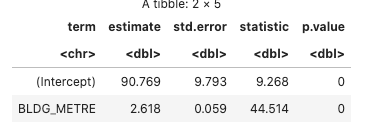

- The value `44.514` is calculated from
    - estimate (`2.618`) / std.error (`0.059`)

#### Summary
- The best linear predictor is the least squares regression line.
- We estimate the regression line using sample estimators of the mean, sd, and correlation
- $\hat{\beta_0}$, $\hat{\beta_1}$ are random variables
    - Their error : standard error (sd of sampling distribution)
    - Their distribution : sampling distribution 
- Both the SE and sampling distribution can be obtained from bootstrapping or asymptotic theory (using the `lm` function)

**NOTE: Bootstrapping**
- Bootstrapping is taking random samples with replacement from the original sample (let’s call them “bootstrap samples”). 
- We might have 100 bootstrap samples. 
- We then calculate a slope & intercept for each bootstrap sample and that **forms the sampling distribution** for those parameters.
- The standard deviation of a sampling distribution is the standard error


**NOTE: residual.scale**
- $Y_i = \beta_0 + \beta_1X_i + \varepsilon_i$
- $E[\varepsilon_i] = 0$ and $\varepsilon_i$ is iid
- $V(\varepsilon_i) = {\sigma_{\varepsilon}}^2$
    - residual.scale is the variance of $\varepsilon_i$ (error)!
    - R assumes that it is always the same

## Lecture 4: MLR and categorical variables

**Q&A**
1. The values predicted with the estimated model lie on the estimated regression line. (T)
2. `lm` tests the null hypothesis that **the estimated coefficient** equals 0. (F)
    - Correct sentence: `lm` tests the null hypothesis that the **true population parameter** equals 0.
    - We know the estimated coefficient, so we don't need to test about it!
3. `lm` CIs are centered at the true population coefficients. (F)
    - CIs are centered at the estimates! ($\hat{\beta}$)
4. Bootstrap CIs are centered at the true population coefficients. (F)
    - Centered at the estimates! 

### 1. Multiple linear regression

- For random variable $Y_i$:
$$Y_i = \beta_0 + \beta_1X_1 + ... + \beta_pX_p + \varepsilon_i$$

- Multiple linear regression models the conditional expectation as a linear combination of the predictors
$$E[Y|X_1, ..., X_p] = \beta_0 + \beta_1X_1 + ... \beta_{p}X_{p}$$
- We need to estimate regression coefficients $\beta_0, \beta_1, \beta_2, ..., \beta_p$!

### 2. Visualizing the relation between the variable in the sample

```r
dat_s %>% select(assess_val, BLDG_METRE,age) %>% 
    GGally::ggpairs()
```

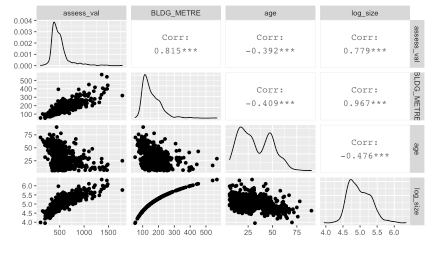

- Easily observe a linear association between variables.

### 3. SLR vs MLR
- SLR models one variable at a time, MLR models many variables at a time.

```r
# SLR
lm_age <- lm(assess_val~age,data=dat_s)
tidy(lm_age)

# MLR
lm_size_age <- lm(assess_val~BLDG_METRE + age,data=dat_s)
```

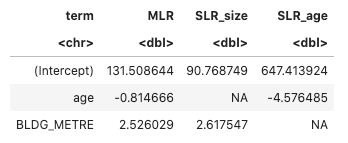
- When we compare the two methods, we can see that the slope for `age` with MLR is very different when it is just estimated with SLR.
    - This is a sign of multicollinearity, or confounding!

#### 4. MLR with continuous predictors
- MLR simultaneously models the association of multiple predictors with the response

**Assumption for MLR**
- When a multiple linear regression is $Y_i = \beta_0 + \beta_1\text{size}_i + \beta_2\text{age}_i+\varepsilon_i$,
    - If we fix the size, we can see the relation between `age` and $Y_i$.
    - If we fix the size, then the slope $\beta_2$ will be the same.
    - It does not depend on the value $\text{size}_i$ for every particular size.
    
- When we see this plot:

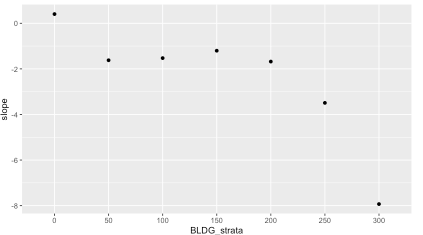

- What can we see?
    - This is the slope `age` when we fixed the `size`, for each value.
    - The slope `age` does not depend on the value of the size! (except for tails)

### 5. Estimating the MLR with `lm`

#### 5.1 Code

```r
lm_s <- lm(response_var ~ ex_var_1 + ex_var_2, data = data)
```
- `lm` uses a method called **least squares** to estimate the coefficients from a random sample.
    - minimizes the mean squared error (MSE) loss function
    
#### 5.2 Interpret results with `lm`

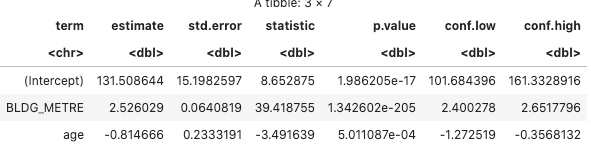

`tidy(lm_size_age, conf.int = TRUE)`

**estimate**
- Estimated slope ($\beta_1, \beta_2$) and intercept. 
- In case of MLR:
    - `BLDG_METRE` ($\beta_1$): Holding `age` constant, for every additional meter in the size of a house, we predict an increase of 2526 dollars in the assessed value.
    - `age` ($\beta_2$): Holding `size` constant, for every additional year a house has, we predict a decrease of 815 dollars in the assessed value.

**std.error**
- Standard error of sampling distribution. 

**statistic**
- This is t-statistic from asymptotic theory. 
- Not the same result from t-test.

**p.value**
- The probability, under the null hypothesis, that we will get a value as extreme as the one observed in sample
- If the value of a variable is smaller than threshold, the variable is statistically not significant. 

**Confidence Intervals**
- `lm` function uses results from asymptotic theory to construct confidence intervals
- The values are centered at `estimate`, and plus/minus `std.error` * `constant`.

### 5.3 Prediction with MLR
- **The predicted value** is a point on the estimated `hyper-plane` (because in this example, we have 2 variables!)
- **The residual** is the distance to the observed value.

$$ \hat{y}_i=131.51 + 2.526 * x_{i1} - 0.815 * x_{i2}; \; r_i=y_i-\hat{y}_i$$ 

- They are random variables since they are functions of the estimated coefficients.
- `augment` function is useful to add in-sample predicted values to the original dataset.

### 5.4 Hypothesis tests on the regression coefficients
- As a default, `lm` tests if the intercept and the slops are 0:
    - For one intercept, two variables:
    - $H_0: \beta_0 = 0$ (null) *vs* $H_1: \beta_0 \neq 0$ (default alternative)
    - $H_0: \beta_1 = 0$ (null) *vs* $H_1: \beta_1 \neq 0$ (default alternative)
    - $H_0: \beta_2 = 0$ (null) *vs* $H_1: \beta_2 \neq 0$ (default alternative)
    
    
- `statistic` from the `lm` result is the result after calculating:
    $$t=\frac{\hat{\beta_j}}{SE(\hat{\beta_j})}$$

- With the p-value, we can say:
    - We have enough evidence that a feature is statistically significant, so we reject the null hypothesis and accept the alternative hypothesis.
    - Or,
    - We don't have enough evidence that a feature isatistically significant, we we fail to reject the null hypothesis.


### 6. MLR: categorical variables with many levels
- We need more dummy variables if we include a categorical variable with more than 2 levels.
- Two dummy variables for three levels. (One reference level)

- For example, a categorical variable have "old, modern, and new" levels.
    $$E[Y|X_2,X_3]=\beta_0 + \beta_2 X_2 + \beta_3 X_3$$
    -> $$E[Y|X_2,X_3]=\beta_0 + \beta_M M + \beta_N N$$

- Here, "Old" is the reference level.

$$\text{M}=X_2 = \left\{ \begin{array}{ll}
         1 & \text{if generation = "Modern"};\\
         0 & \text{if otherwise}\end{array} \right.$$
         
         
$$\text{N}=X_3 = \left\{ \begin{array}{ll}
         1 & \text{if generation = "New"};\\
         0 & \text{if otherwise}\end{array} \right.$$

Then,

- if generation = "old": $E[Y|X_2=0,X_3=0]=\beta_0$
- if generation = "modern": $E[Y|X_2=1]=\beta_0 + \beta_2$
- if generation = "new": $E[Y|X_3=1]=\beta_0 + \beta_3$

and,

- $\beta_2=E[Y|\text{mod}]-E[Y|\text{old}]$ and $H_0: \beta_2=0$

- $\beta_3=E[Y|\text{new}]-E[Y|\text{old}]$ and $H_0: \beta_3=0$

> $\beta_2, \beta_3, ...$ are the difference between the expected value for $Y$ given $X_i$ (sample mean) and the expected value for $Y$ given the reference feature (sample mean). 

#### 6.1 Code
- R creates dummy variables for a factor feature.

```r
tidy(lm(assess_val~generation,dat_s))
```

#### 6.2 Interpretation of the estimated coefficients

- The estimated **intercept**, $\hat{\beta}_0=409.58$, is the average assessed value for `Old properties`.

> It is the sample version of the conditional expectation (mean of the reference group)

- The estimated **"slopes"** (we have 2, one per dummy variable) are the **differences of sample means**
    - $\hat{\beta}_2=131.79$: difference between **sample mean of Modern houses and sample mean of Old houses**
    - $\hat{\beta}_3=159.5219$: difference between **sample mean of New houses and sample mean of Old houses**

> It is the sample version of the difference of the conditional expectations (or group means)

- The y_i in the subpopulation have a distribution, referred to as the conditional distribution, and this distribution has an expected value referred to as the conditional expectation.
    - If we know extra information about a sample, then the conditional expectation is the best estimator for the population.
- The conditional standard deviation quantifies the precision of the prediction.
- The conditional expectation for whole X_i values follows a linear line -> linear regression

```r
mu_x <- mean(dat_s\$BLDG_METRE)
mu_y <- mean(dat_s\$assess_val)
s_x <- sd(dat_s\$BLDG_METRE)
s_y <- sd(dat_s\$assess_val)
r <- cor(dat_s\$BLDG_METRE, dat_s\$assess_val)

my_intercept = mu_y - r * s_y/s_x * mu_x
my_slope = r * s_y/s_x  
```

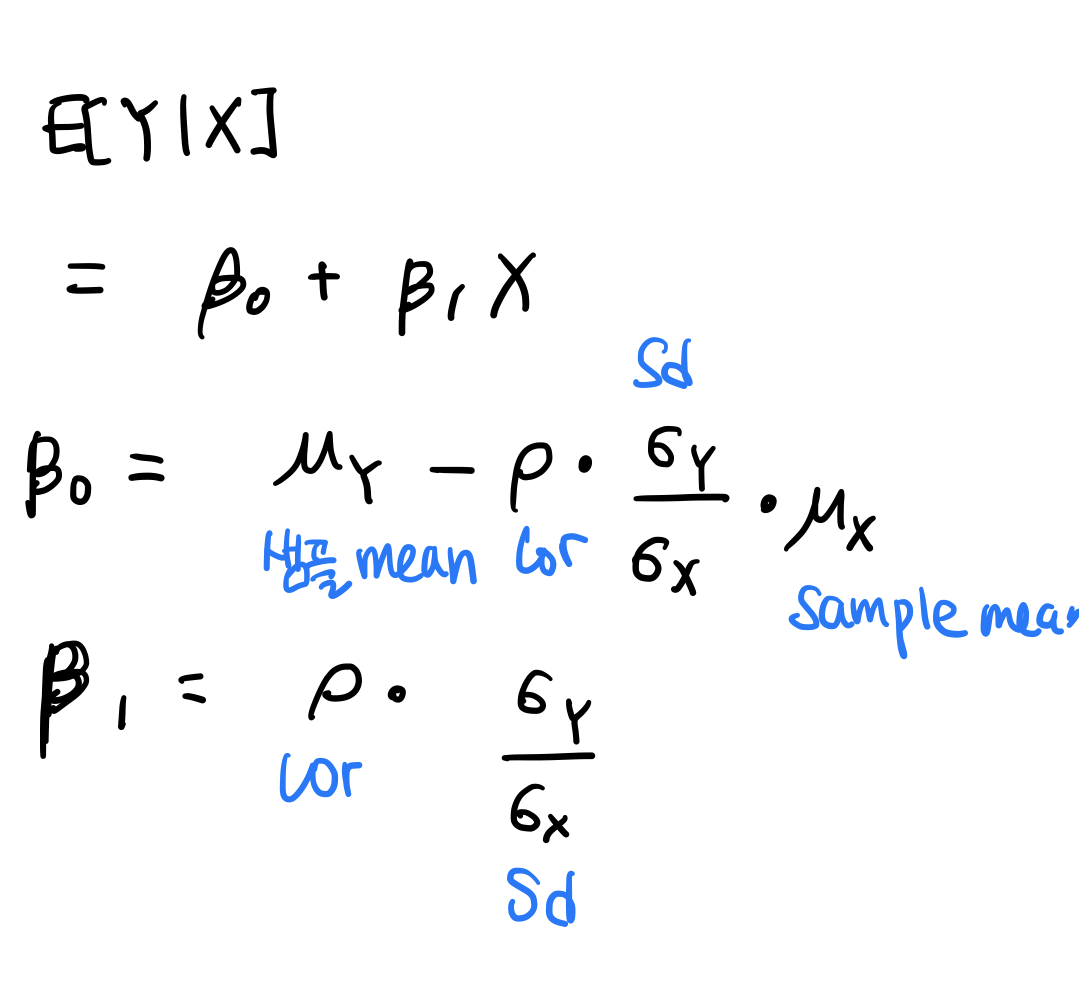